# Various Classification Models

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

In [2]:
n_cpu = os.cpu_count()
print("Number of CPUs:", n_cpu)

Number of CPUs: 8


In [10]:
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "./data/Combined_EMG_data*"))
data_list = []
X_list = []
y_list = []

for i in csv_files:
      
    df = pd.read_csv(i)
    data_list.append(df)

for j in data_list:
    X = j[['EMG Sensor 1', 'EMG Sensor 2', 'EMG Sensor 3', 'EMG Sensor 4']].to_numpy().reshape(-1,4)
    y = j['Mode'].to_numpy()
    X_list.append(X)
    y_list.append(y)
    
X = np.vstack(X_list)
y = np.hstack(y_list)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

## KNN

In [19]:
KNN = KNeighborsClassifier()

parameter_grid = {'n_neighbors': np.arange(1,31), 'weights': ['uniform','distance'], 'metric': ['euclidean','manhattan','chebyshev','minkowski']}

grid = GridSearchCV(estimator=KNN, param_grid=parameter_grid, n_jobs=n_cpu-1, cv=5)

grid.fit(X_train, y_train)

KNN = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'], weights=grid.best_params_['weights'], metric=grid.best_params_['metric'])

print(grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}


In [20]:
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
probs = KNN.predict_proba(X_test)
score = KNN.score(X_test, y_test)

# print(f"Predictions: \n{y_pred}")
# print(f"Probabilities: \n{probs}")
print(f"K: {grid.best_params_['n_neighbors']}")
print(f"Weights: {grid.best_params_['weights']}")
print(f"Metric: {grid.best_params_['metric']}")
print(f"Score: {score}")

K: 13
Weights: distance
Metric: manhattan
Score: 0.881590319792567


In [21]:
none = np.array([0.26,0.07,0.1,0.32]).reshape(-1,4)
pred = KNN.predict(none)
print(pred)

index = np.array([0.9, 0.1, 0.4, 0.5]).reshape(-1,4)
pred = KNN.predict(index)
print(pred)

middle = np.array([1.6, 0.2, 1.5, 1.6]).reshape(-1,4)
pred = KNN.predict(middle)
print(pred)

fourth = np.array([1.9, 0.3, 0.6, 1.1]).reshape(-1,4)
pred = KNN.predict(fourth)
print(pred)

pinky = np.array([0.6, 0.2, 0.6, 1.1]).reshape(-1,4)
pred = KNN.predict(pinky)
print(pred)

[0]
[1]
[2]
[3]
[4]


### True Test Vaues

In [22]:
# Set 1
none = np.array([0.18,0.07,0.27,0.26]).reshape(-1,4)
pred = KNN.predict(none)
print(pred)

index = np.array([1.07, 0.08, 0.49, 0.61]).reshape(-1,4)
pred = KNN.predict(index)
print(pred)

middle = np.array([2.02, 0.12, 0.76, 1.42]).reshape(-1,4)
pred = KNN.predict(middle)
print(pred)

fourth = np.array([1.06, 0.16, 0.61, 1.25]).reshape(-1,4)
pred = KNN.predict(fourth)
print(pred)

pinky = np.array([0.55, 0.1, 0.28, 0.88]).reshape(-1,4)
pred = KNN.predict(pinky)
print(pred)

# Set 2
none = np.array([0.29,0.07,0.19,0.23]).reshape(-1,4)
pred = KNN.predict(none)
print(pred)

index = np.array([1.68,0.11,0.85,0.79]).reshape(-1,4)
pred = KNN.predict(index)
print(pred)

middle = np.array([1.12,0.09,0.75,1.12]).reshape(-1,4)
pred = KNN.predict(middle)
print(pred)

fourth = np.array([0.77,0.11,0.52,1.49]).reshape(-1,4)
pred = KNN.predict(fourth)
print(pred)

pinky = np.array([0.57,0.08,0.44,0.99]).reshape(-1,4)
pred = KNN.predict(pinky)
print(pred)


[0]
[1]
[2]
[3]
[4]
[0]
[1]
[2]
[3]
[4]


## Random Forest

In [23]:
RFC = RandomForestClassifier(random_state=1)

parameter_grid = {'n_estimators': np.arange(5, 105, 5), 
                  'max_depth': np.arange(5, 105 ,5),
                  'max_features': ['auto', 'log2']}

grid = GridSearchCV(estimator=RFC, param_grid=parameter_grid, verbose=3, n_jobs=n_cpu-1, cv=5)

grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV 4/5] END max_depth=5, max_features=auto, n_estimators=5;, score=0.833 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, n_estimators=20;, score=0.869 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, n_estimators=25;, score=0.874 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=auto, n_estimators=35;, score=0.869 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=auto, n_estimators=40;, score=0.850 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=auto, n_estimators=50;, score=0.850 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, n_estimators=50;, score=0.876 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, n_estimators=65;, score=0.878 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=auto, n_estimators=70;, score=0.861 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=auto, n_estimators=80;, score=0.876 total time=   0.

[CV 3/5] END max_depth=5, max_features=auto, n_estimators=5;, score=0.866 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, n_estimators=15;, score=0.874 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, n_estimators=20;, score=0.842 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=auto, n_estimators=30;, score=0.854 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=auto, n_estimators=35;, score=0.872 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, n_estimators=40;, score=0.874 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=auto, n_estimators=55;, score=0.872 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=auto, n_estimators=55;, score=0.846 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=auto, n_estimators=70;, score=0.870 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=auto, n_estimators=70;, score=0.870 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=auto, n_estimators=85;

[CV 2/5] END max_depth=5, max_features=auto, n_estimators=10;, score=0.857 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, n_estimators=25;, score=0.856 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=auto, n_estimators=30;, score=0.848 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=auto, n_estimators=40;, score=0.863 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, n_estimators=45;, score=0.876 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=auto, n_estimators=50;, score=0.861 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=auto, n_estimators=60;, score=0.844 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=auto, n_estimators=60;, score=0.879 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=auto, n_estimators=75;, score=0.870 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=auto, n_estimators=75;, score=0.846 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=auto, n_estimators=90

[CV 1/5] END max_depth=5, max_features=auto, n_estimators=5;, score=0.850 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, n_estimators=10;, score=0.872 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, n_estimators=10;, score=0.857 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, n_estimators=10;, score=0.866 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, n_estimators=15;, score=0.859 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, n_estimators=15;, score=0.865 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, n_estimators=15;, score=0.878 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, n_estimators=20;, score=0.874 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, n_estimators=25;, score=0.867 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, n_estimators=30;, score=0.874 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=auto, n_estimators=35;

[CV 4/5] END max_depth=15, max_features=auto, n_estimators=85;, score=0.879 total time=   0.2s
[CV 5/5] END max_depth=15, max_features=auto, n_estimators=95;, score=0.894 total time=   0.2s
[CV 1/5] END max_depth=15, max_features=auto, n_estimators=100;, score=0.885 total time=   0.2s
[CV 3/5] END max_depth=15, max_features=log2, n_estimators=15;, score=0.863 total time=   0.0s
[CV 4/5] END max_depth=15, max_features=log2, n_estimators=15;, score=0.865 total time=   0.0s
[CV 4/5] END max_depth=15, max_features=log2, n_estimators=20;, score=0.863 total time=   0.0s
[CV 5/5] END max_depth=15, max_features=log2, n_estimators=20;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=15, max_features=log2, n_estimators=30;, score=0.874 total time=   0.1s
[CV 3/5] END max_depth=15, max_features=log2, n_estimators=30;, score=0.865 total time=   0.1s
[CV 5/5] END max_depth=15, max_features=log2, n_estimators=35;, score=0.889 total time=   0.1s
[CV 1/5] END max_depth=15, max_features=log2, n_e

[CV 3/5] END max_depth=15, max_features=log2, n_estimators=85;, score=0.874 total time=   0.3s
[CV 4/5] END max_depth=15, max_features=log2, n_estimators=85;, score=0.879 total time=   0.3s
[CV 2/5] END max_depth=15, max_features=log2, n_estimators=100;, score=0.874 total time=   0.3s
[CV 3/5] END max_depth=15, max_features=log2, n_estimators=100;, score=0.876 total time=   0.3s
[CV 2/5] END max_depth=20, max_features=auto, n_estimators=40;, score=0.878 total time=   0.1s
[CV 3/5] END max_depth=20, max_features=auto, n_estimators=40;, score=0.876 total time=   0.1s
[CV 1/5] END max_depth=20, max_features=auto, n_estimators=55;, score=0.885 total time=   0.2s
[CV 2/5] END max_depth=20, max_features=auto, n_estimators=55;, score=0.878 total time=   0.2s
[CV 2/5] END max_depth=20, max_features=auto, n_estimators=70;, score=0.881 total time=   0.2s
[CV 3/5] END max_depth=20, max_features=auto, n_estimators=70;, score=0.872 total time=   0.2s
[CV 1/5] END max_depth=20, max_features=auto, n_

[CV 3/5] END max_depth=20, max_features=auto, n_estimators=25;, score=0.865 total time=   0.1s
[CV 4/5] END max_depth=20, max_features=auto, n_estimators=25;, score=0.870 total time=   0.1s
[CV 3/5] END max_depth=20, max_features=auto, n_estimators=35;, score=0.876 total time=   0.1s
[CV 4/5] END max_depth=20, max_features=auto, n_estimators=35;, score=0.872 total time=   0.1s
[CV 2/5] END max_depth=20, max_features=auto, n_estimators=50;, score=0.874 total time=   0.2s
[CV 3/5] END max_depth=20, max_features=auto, n_estimators=50;, score=0.876 total time=   0.2s
[CV 1/5] END max_depth=20, max_features=auto, n_estimators=65;, score=0.885 total time=   0.2s
[CV 2/5] END max_depth=20, max_features=auto, n_estimators=65;, score=0.880 total time=   0.2s
[CV 2/5] END max_depth=20, max_features=auto, n_estimators=80;, score=0.878 total time=   0.3s
[CV 3/5] END max_depth=20, max_features=auto, n_estimators=80;, score=0.874 total time=   0.3s
[CV 3/5] END max_depth=20, max_features=auto, n_es

[CV 2/5] END max_depth=30, max_features=auto, n_estimators=45;, score=0.878 total time=   0.1s
[CV 2/5] END max_depth=30, max_features=auto, n_estimators=60;, score=0.880 total time=   0.2s
[CV 3/5] END max_depth=30, max_features=auto, n_estimators=60;, score=0.870 total time=   0.2s
[CV 1/5] END max_depth=30, max_features=auto, n_estimators=75;, score=0.885 total time=   0.2s
[CV 2/5] END max_depth=30, max_features=auto, n_estimators=75;, score=0.878 total time=   0.2s
[CV 5/5] END max_depth=30, max_features=auto, n_estimators=85;, score=0.892 total time=   0.3s
[CV 1/5] END max_depth=30, max_features=auto, n_estimators=90;, score=0.883 total time=   0.3s
[CV 2/5] END max_depth=30, max_features=auto, n_estimators=100;, score=0.881 total time=   0.3s
[CV 3/5] END max_depth=30, max_features=auto, n_estimators=100;, score=0.874 total time=   0.3s
[CV 2/5] END max_depth=30, max_features=log2, n_estimators=40;, score=0.878 total time=   0.1s
[CV 3/5] END max_depth=30, max_features=log2, n_

[CV 3/5] END max_depth=30, max_features=log2, n_estimators=45;, score=0.870 total time=   0.1s
[CV 4/5] END max_depth=30, max_features=log2, n_estimators=45;, score=0.876 total time=   0.1s
[CV 5/5] END max_depth=30, max_features=log2, n_estimators=55;, score=0.885 total time=   0.1s
[CV 1/5] END max_depth=30, max_features=log2, n_estimators=60;, score=0.883 total time=   0.1s
[CV 5/5] END max_depth=30, max_features=log2, n_estimators=65;, score=0.885 total time=   0.1s
[CV 1/5] END max_depth=30, max_features=log2, n_estimators=70;, score=0.881 total time=   0.1s
[CV 5/5] END max_depth=30, max_features=log2, n_estimators=75;, score=0.891 total time=   0.2s
[CV 1/5] END max_depth=30, max_features=log2, n_estimators=80;, score=0.885 total time=   0.2s
[CV 5/5] END max_depth=30, max_features=log2, n_estimators=85;, score=0.892 total time=   0.2s
[CV 1/5] END max_depth=30, max_features=log2, n_estimators=90;, score=0.883 total time=   0.2s
[CV 4/5] END max_depth=30, max_features=log2, n_es

[CV 3/5] END max_depth=35, max_features=auto, n_estimators=5;, score=0.857 total time=   0.0s
[CV 4/5] END max_depth=35, max_features=auto, n_estimators=5;, score=0.863 total time=   0.0s
[CV 2/5] END max_depth=35, max_features=auto, n_estimators=10;, score=0.863 total time=   0.0s
[CV 3/5] END max_depth=35, max_features=auto, n_estimators=10;, score=0.859 total time=   0.0s
[CV 1/5] END max_depth=35, max_features=auto, n_estimators=15;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=35, max_features=auto, n_estimators=15;, score=0.876 total time=   0.0s
[CV 4/5] END max_depth=35, max_features=auto, n_estimators=20;, score=0.861 total time=   0.1s
[CV 5/5] END max_depth=35, max_features=auto, n_estimators=20;, score=0.870 total time=   0.1s
[CV 1/5] END max_depth=35, max_features=auto, n_estimators=35;, score=0.885 total time=   0.1s
[CV 2/5] END max_depth=35, max_features=auto, n_estimators=35;, score=0.876 total time=   0.1s
[CV 4/5] END max_depth=35, max_features=auto, n_esti

[CV 5/5] END max_depth=40, max_features=auto, n_estimators=10;, score=0.874 total time=   0.0s
[CV 5/5] END max_depth=40, max_features=auto, n_estimators=15;, score=0.874 total time=   0.0s
[CV 1/5] END max_depth=40, max_features=auto, n_estimators=20;, score=0.891 total time=   0.1s
[CV 3/5] END max_depth=40, max_features=auto, n_estimators=25;, score=0.865 total time=   0.1s
[CV 4/5] END max_depth=40, max_features=auto, n_estimators=25;, score=0.870 total time=   0.1s
[CV 1/5] END max_depth=40, max_features=auto, n_estimators=35;, score=0.885 total time=   0.1s
[CV 2/5] END max_depth=40, max_features=auto, n_estimators=35;, score=0.876 total time=   0.1s
[CV 5/5] END max_depth=40, max_features=auto, n_estimators=45;, score=0.889 total time=   0.1s
[CV 1/5] END max_depth=40, max_features=auto, n_estimators=50;, score=0.883 total time=   0.2s
[CV 4/5] END max_depth=40, max_features=auto, n_estimators=60;, score=0.876 total time=   0.2s
[CV 5/5] END max_depth=40, max_features=auto, n_es

[CV 5/5] END max_depth=45, max_features=log2, n_estimators=65;, score=0.885 total time=   0.1s
[CV 1/5] END max_depth=45, max_features=log2, n_estimators=70;, score=0.881 total time=   0.2s
[CV 5/5] END max_depth=45, max_features=log2, n_estimators=75;, score=0.891 total time=   0.2s
[CV 1/5] END max_depth=45, max_features=log2, n_estimators=80;, score=0.885 total time=   0.2s
[CV 4/5] END max_depth=45, max_features=log2, n_estimators=90;, score=0.876 total time=   0.2s
[CV 5/5] END max_depth=45, max_features=log2, n_estimators=90;, score=0.892 total time=   0.3s
[CV 1/5] END max_depth=50, max_features=auto, n_estimators=5;, score=0.874 total time=   0.0s
[CV 2/5] END max_depth=50, max_features=auto, n_estimators=5;, score=0.852 total time=   0.0s
[CV 5/5] END max_depth=50, max_features=auto, n_estimators=5;, score=0.859 total time=   0.0s
[CV 1/5] END max_depth=50, max_features=auto, n_estimators=10;, score=0.889 total time=   0.0s
[CV 4/5] END max_depth=50, max_features=auto, n_estim

[CV 4/5] END max_depth=45, max_features=log2, n_estimators=20;, score=0.861 total time=   0.1s
[CV 5/5] END max_depth=45, max_features=log2, n_estimators=20;, score=0.870 total time=   0.1s
[CV 5/5] END max_depth=45, max_features=log2, n_estimators=25;, score=0.868 total time=   0.1s
[CV 1/5] END max_depth=45, max_features=log2, n_estimators=30;, score=0.881 total time=   0.1s
[CV 4/5] END max_depth=45, max_features=log2, n_estimators=40;, score=0.872 total time=   0.1s
[CV 5/5] END max_depth=45, max_features=log2, n_estimators=40;, score=0.883 total time=   0.1s
[CV 3/5] END max_depth=45, max_features=log2, n_estimators=55;, score=0.874 total time=   0.2s
[CV 4/5] END max_depth=45, max_features=log2, n_estimators=55;, score=0.876 total time=   0.2s
[CV 4/5] END max_depth=45, max_features=log2, n_estimators=70;, score=0.876 total time=   0.2s
[CV 5/5] END max_depth=45, max_features=log2, n_estimators=70;, score=0.889 total time=   0.2s
[CV 3/5] END max_depth=45, max_features=log2, n_es

[CV 4/5] END max_depth=50, max_features=log2, n_estimators=90;, score=0.876 total time=   0.3s
[CV 5/5] END max_depth=50, max_features=log2, n_estimators=90;, score=0.892 total time=   0.3s
[CV 3/5] END max_depth=55, max_features=auto, n_estimators=5;, score=0.857 total time=   0.0s
[CV 4/5] END max_depth=55, max_features=auto, n_estimators=5;, score=0.863 total time=   0.0s
[CV 2/5] END max_depth=55, max_features=auto, n_estimators=10;, score=0.863 total time=   0.0s
[CV 3/5] END max_depth=55, max_features=auto, n_estimators=10;, score=0.859 total time=   0.0s
[CV 3/5] END max_depth=55, max_features=auto, n_estimators=15;, score=0.866 total time=   0.0s
[CV 4/5] END max_depth=55, max_features=auto, n_estimators=15;, score=0.857 total time=   0.0s
[CV 1/5] END max_depth=55, max_features=auto, n_estimators=25;, score=0.887 total time=   0.1s
[CV 2/5] END max_depth=55, max_features=auto, n_estimators=25;, score=0.869 total time=   0.1s
[CV 1/5] END max_depth=55, max_features=auto, n_esti

[CV 1/5] END max_depth=55, max_features=log2, n_estimators=60;, score=0.883 total time=   0.2s
[CV 4/5] END max_depth=55, max_features=log2, n_estimators=70;, score=0.876 total time=   0.2s
[CV 5/5] END max_depth=55, max_features=log2, n_estimators=70;, score=0.889 total time=   0.2s
[CV 2/5] END max_depth=55, max_features=log2, n_estimators=90;, score=0.880 total time=   0.3s
[CV 3/5] END max_depth=55, max_features=log2, n_estimators=90;, score=0.872 total time=   0.3s
[CV 1/5] END max_depth=60, max_features=auto, n_estimators=5;, score=0.874 total time=   0.0s
[CV 2/5] END max_depth=60, max_features=auto, n_estimators=5;, score=0.852 total time=   0.0s
[CV 3/5] END max_depth=60, max_features=auto, n_estimators=5;, score=0.857 total time=   0.0s
[CV 4/5] END max_depth=60, max_features=auto, n_estimators=5;, score=0.863 total time=   0.0s
[CV 2/5] END max_depth=60, max_features=auto, n_estimators=10;, score=0.863 total time=   0.0s
[CV 3/5] END max_depth=60, max_features=auto, n_estima

[CV 5/5] END max_depth=65, max_features=auto, n_estimators=85;, score=0.892 total time=   0.3s
[CV 1/5] END max_depth=65, max_features=auto, n_estimators=90;, score=0.883 total time=   0.3s
[CV 2/5] END max_depth=65, max_features=auto, n_estimators=100;, score=0.881 total time=   0.3s
[CV 3/5] END max_depth=65, max_features=auto, n_estimators=100;, score=0.874 total time=   0.3s
[CV 5/5] END max_depth=65, max_features=log2, n_estimators=35;, score=0.881 total time=   0.1s
[CV 1/5] END max_depth=65, max_features=log2, n_estimators=40;, score=0.883 total time=   0.1s
[CV 4/5] END max_depth=65, max_features=log2, n_estimators=50;, score=0.879 total time=   0.2s
[CV 5/5] END max_depth=65, max_features=log2, n_estimators=50;, score=0.879 total time=   0.2s
[CV 1/5] END max_depth=65, max_features=log2, n_estimators=65;, score=0.885 total time=   0.2s
[CV 2/5] END max_depth=65, max_features=log2, n_estimators=65;, score=0.878 total time=   0.2s
[CV 5/5] END max_depth=65, max_features=log2, n_

[CV 5/5] END max_depth=65, max_features=auto, n_estimators=65;, score=0.885 total time=   0.2s
[CV 1/5] END max_depth=65, max_features=auto, n_estimators=70;, score=0.881 total time=   0.2s
[CV 1/5] END max_depth=65, max_features=auto, n_estimators=85;, score=0.883 total time=   0.3s
[CV 2/5] END max_depth=65, max_features=auto, n_estimators=85;, score=0.878 total time=   0.2s
[CV 3/5] END max_depth=65, max_features=auto, n_estimators=95;, score=0.876 total time=   0.3s
[CV 4/5] END max_depth=65, max_features=auto, n_estimators=95;, score=0.874 total time=   0.3s
[CV 4/5] END max_depth=65, max_features=log2, n_estimators=20;, score=0.861 total time=   0.1s
[CV 5/5] END max_depth=65, max_features=log2, n_estimators=20;, score=0.870 total time=   0.1s
[CV 2/5] END max_depth=65, max_features=log2, n_estimators=30;, score=0.872 total time=   0.1s
[CV 3/5] END max_depth=65, max_features=log2, n_estimators=30;, score=0.865 total time=   0.1s
[CV 3/5] END max_depth=65, max_features=log2, n_es

[CV 5/5] END max_depth=70, max_features=auto, n_estimators=100;, score=0.892 total time=   0.3s
[CV 1/5] END max_depth=70, max_features=log2, n_estimators=45;, score=0.883 total time=   0.1s
[CV 2/5] END max_depth=70, max_features=log2, n_estimators=45;, score=0.878 total time=   0.1s
[CV 2/5] END max_depth=70, max_features=log2, n_estimators=60;, score=0.880 total time=   0.2s
[CV 3/5] END max_depth=70, max_features=log2, n_estimators=60;, score=0.870 total time=   0.2s
[CV 1/5] END max_depth=70, max_features=log2, n_estimators=75;, score=0.885 total time=   0.2s
[CV 2/5] END max_depth=70, max_features=log2, n_estimators=75;, score=0.878 total time=   0.2s
[CV 5/5] END max_depth=70, max_features=log2, n_estimators=85;, score=0.892 total time=   0.3s
[CV 1/5] END max_depth=70, max_features=log2, n_estimators=90;, score=0.883 total time=   0.3s
[CV 1/5] END max_depth=75, max_features=auto, n_estimators=5;, score=0.874 total time=   0.0s
[CV 2/5] END max_depth=75, max_features=auto, n_es

[CV 5/5] END max_depth=75, max_features=log2, n_estimators=25;, score=0.868 total time=   0.1s
[CV 1/5] END max_depth=75, max_features=log2, n_estimators=30;, score=0.881 total time=   0.1s
[CV 2/5] END max_depth=75, max_features=log2, n_estimators=40;, score=0.878 total time=   0.1s
[CV 3/5] END max_depth=75, max_features=log2, n_estimators=40;, score=0.876 total time=   0.1s
[CV 1/5] END max_depth=75, max_features=log2, n_estimators=55;, score=0.885 total time=   0.2s
[CV 2/5] END max_depth=75, max_features=log2, n_estimators=55;, score=0.878 total time=   0.2s
[CV 5/5] END max_depth=75, max_features=log2, n_estimators=65;, score=0.885 total time=   0.2s
[CV 1/5] END max_depth=75, max_features=log2, n_estimators=70;, score=0.881 total time=   0.2s
[CV 1/5] END max_depth=75, max_features=log2, n_estimators=85;, score=0.883 total time=   0.3s
[CV 2/5] END max_depth=75, max_features=log2, n_estimators=85;, score=0.878 total time=   0.3s
[CV 2/5] END max_depth=75, max_features=log2, n_es

[CV 3/5] END max_depth=80, max_features=log2, n_estimators=5;, score=0.857 total time=   0.0s
[CV 4/5] END max_depth=80, max_features=log2, n_estimators=5;, score=0.863 total time=   0.0s
[CV 2/5] END max_depth=80, max_features=log2, n_estimators=10;, score=0.863 total time=   0.0s
[CV 3/5] END max_depth=80, max_features=log2, n_estimators=10;, score=0.859 total time=   0.0s
[CV 3/5] END max_depth=80, max_features=log2, n_estimators=15;, score=0.866 total time=   0.0s
[CV 4/5] END max_depth=80, max_features=log2, n_estimators=15;, score=0.857 total time=   0.0s
[CV 4/5] END max_depth=80, max_features=log2, n_estimators=20;, score=0.861 total time=   0.1s
[CV 5/5] END max_depth=80, max_features=log2, n_estimators=20;, score=0.870 total time=   0.1s
[CV 4/5] END max_depth=80, max_features=log2, n_estimators=30;, score=0.872 total time=   0.1s
[CV 5/5] END max_depth=80, max_features=log2, n_estimators=30;, score=0.881 total time=   0.1s
[CV 3/5] END max_depth=80, max_features=log2, n_esti

[CV 4/5] END max_depth=85, max_features=log2, n_estimators=25;, score=0.870 total time=   0.1s
[CV 5/5] END max_depth=85, max_features=log2, n_estimators=35;, score=0.881 total time=   0.1s
[CV 1/5] END max_depth=85, max_features=log2, n_estimators=40;, score=0.883 total time=   0.1s
[CV 4/5] END max_depth=85, max_features=log2, n_estimators=50;, score=0.879 total time=   0.2s
[CV 5/5] END max_depth=85, max_features=log2, n_estimators=50;, score=0.879 total time=   0.2s
[CV 3/5] END max_depth=85, max_features=log2, n_estimators=65;, score=0.874 total time=   0.2s
[CV 4/5] END max_depth=85, max_features=log2, n_estimators=65;, score=0.872 total time=   0.2s
[CV 4/5] END max_depth=85, max_features=log2, n_estimators=80;, score=0.874 total time=   0.2s
[CV 5/5] END max_depth=85, max_features=log2, n_estimators=80;, score=0.892 total time=   0.3s
[CV 1/5] END max_depth=85, max_features=log2, n_estimators=95;, score=0.883 total time=   0.3s
[CV 2/5] END max_depth=85, max_features=log2, n_es

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 90}


In [24]:
RFC = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'], max_depth=grid.best_params_['max_depth'], 
                             max_features=grid.best_params_['max_features'], 
                             n_jobs=n_cpu-1, random_state=1)

RFC.fit(X_train, y_train)

y_pred = RFC.predict(X_test)
print(f"Number of estimators: {grid.best_params_['n_estimators']}")
print(f"Max depth: {grid.best_params_['max_depth']}")
print(f"Max features: {grid.best_params_['max_features']}")
print(f"Score: {RFC.score(X_test, y_test)}")

Number of estimators: 90
Max depth: 10
Max features: auto
Score: 0.8954191875540191


In [25]:
none = np.array([0.26,0.07,0.1,0.32]).reshape(-1,4)
pred = RFC.predict(none)
print(pred)

index = np.array([0.9, 0.1, 0.4, 0.5]).reshape(-1,4)
pred = RFC.predict(index)
print(pred)

middle = np.array([1.6, 0.2, 1.5, 1.6]).reshape(-1,4)
pred = RFC.predict(middle)
print(pred)

fourth = np.array([1.9, 0.3, 0.6, 1.1]).reshape(-1,4)
pred = RFC.predict(fourth)
print(pred)

pinky = np.array([0.6, 0.2, 0.6, 1.1]).reshape(-1,4)
pred = RFC.predict(pinky)
print(pred)

[0]
[1]
[2]
[3]
[4]


### True Test Values

In [26]:
# Set 1
none = np.array([0.18,0.07,0.27,0.26]).reshape(-1,4)
pred = KNN.predict(none)
print(pred)

index = np.array([1.07, 0.08, 0.49, 0.61]).reshape(-1,4)
pred = KNN.predict(index)
print(pred)

middle = np.array([2.02, 0.12, 0.76, 1.42]).reshape(-1,4)
pred = KNN.predict(middle)
print(pred)

fourth = np.array([1.06, 0.16, 0.61, 1.25]).reshape(-1,4)
pred = KNN.predict(fourth)
print(pred)

pinky = np.array([0.55, 0.1, 0.28, 0.88]).reshape(-1,4)
pred = KNN.predict(pinky)
print(pred)

# Set 2
none = np.array([0.29,0.07,0.19,0.23]).reshape(-1,4)
pred = KNN.predict(none)
print(pred)

index = np.array([1.68,0.11,0.85,0.79]).reshape(-1,4)
pred = KNN.predict(index)
print(pred)

middle = np.array([1.12,0.09,0.75,1.12]).reshape(-1,4)
pred = KNN.predict(middle)
print(pred)

fourth = np.array([0.77,0.11,0.52,1.49]).reshape(-1,4)
pred = KNN.predict(fourth)
print(pred)

pinky = np.array([0.57,0.08,0.44,0.99]).reshape(-1,4)
pred = KNN.predict(pinky)
print(pred)


[0]
[1]
[2]
[3]
[4]
[0]
[1]
[2]
[3]
[4]


## Multilayer Perceptron

In [57]:
# 3 layers: input layer, output layer, and hidden layer
# input layers receives input signal, output performs prediction and classifiation, hiden layers perform computations
# hidden_layer_sizes - determines number of hidden layers to use and neurons in each

MLP = MLPClassifier(activation='relu',solver='adam' ,random_state=1, max_iter=1200)

parameter_grid = {'hidden_layer_sizes': [(200,200,200,), (200,150,100,)],
                  'learning_rate': ['constant','adaptive'],} 

grid = GridSearchCV(estimator=MLP, param_grid=parameter_grid, verbose=2, n_jobs=n_cpu-1, cv=5) 
grid.fit(X_train, y_train) 

print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'hidden_layer_sizes': (200, 200, 200), 'learning_rate': 'constant'}
0.8861726104583247


In [52]:
MLP = MLPClassifier(hidden_layer_sizes=grid.best_params_['hidden_layer_sizes'], activation='relu', solver='adam', learning_rate=grid.best_params_['learning_rate'], random_state=1, max_iter=1200)
MLP.fit(X_train, y_train)

probs = MLP.predict_proba(X_test)
preds = MLP.predict(X_test)
score = MLP.score(X_test, y_test)

print(f"Hidden layer sizes: {grid.best_params_['hidden_layer_sizes']}")
print(f"Learning rate: {grid.best_params_['learning_rate']}")
print(f"Score: {score}")

Hidden layer sizes: (200, 200, 200)
Learning rate: constant
Score: 0.891961970613656


In [53]:
y_true, y_pred = y_test , MLP.predict(X_test)

print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       569
           1       0.91      0.93      0.92       182
           2       0.74      0.82      0.78       154
           3       0.73      0.51      0.60       130
           4       0.77      0.87      0.82       122

    accuracy                           0.89      1157
   macro avg       0.83      0.82      0.82      1157
weighted avg       0.89      0.89      0.89      1157



In [54]:
none = np.array([0.26,0.07,0.1,0.32]).reshape(-1,4)
pred = MLP.predict(none)
print(pred)

index = np.array([0.9, 0.1, 0.4, 0.5]).reshape(-1,4)
pred = MLP.predict(index)
print(pred)

middle = np.array([1.6, 0.2, 1.5, 1.6]).reshape(-1,4)
pred = MLP.predict(middle)
print(pred)

fourth = np.array([1.9, 0.3, 0.6, 1.1]).reshape(-1,4)
pred = MLP.predict(fourth)
print(pred)

pinky = np.array([0.6, 0.2, 0.6, 1.1]).reshape(-1,4)
pred = MLP.predict(pinky)
print(pred)

[0]
[1]
[2]
[3]
[4]


### True Test Values

In [55]:
# Set 1
none = np.array([0.18,0.07,0.27,0.26]).reshape(-1,4)
pred = KNN.predict(none)
print(pred)

index = np.array([1.07, 0.08, 0.49, 0.61]).reshape(-1,4)
pred = KNN.predict(index)
print(pred)

middle = np.array([2.02, 0.12, 0.76, 1.42]).reshape(-1,4)
pred = KNN.predict(middle)
print(pred)

fourth = np.array([1.06, 0.16, 0.61, 1.25]).reshape(-1,4)
pred = KNN.predict(fourth)
print(pred)

pinky = np.array([0.55, 0.1, 0.28, 0.88]).reshape(-1,4)
pred = KNN.predict(pinky)
print(pred)

# Set 2
none = np.array([0.29,0.07,0.19,0.23]).reshape(-1,4)
pred = KNN.predict(none)
print(pred)

index = np.array([1.68,0.11,0.85,0.79]).reshape(-1,4)
pred = KNN.predict(index)
print(pred)

middle = np.array([1.12,0.09,0.75,1.12]).reshape(-1,4)
pred = KNN.predict(middle)
print(pred)

fourth = np.array([0.77,0.11,0.52,1.49]).reshape(-1,4)
pred = KNN.predict(fourth)
print(pred)

pinky = np.array([0.57,0.08,0.44,0.99]).reshape(-1,4)
pred = KNN.predict(pinky)
print(pred)


[0]
[1]
[2]
[3]
[4]
[0]
[1]
[2]
[3]
[4]


## Tensorflow

Epoch 1/70
76/76 [==============================] - 0s 2ms/step - loss: 1.4430 - val_loss: 1.2249
Epoch 2/70
76/76 [==============================] - 0s 1ms/step - loss: 1.0446 - val_loss: 0.8892
Epoch 3/70
76/76 [==============================] - 0s 1ms/step - loss: 0.8059 - val_loss: 0.7294
Epoch 4/70
76/76 [==============================] - 0s 1ms/step - loss: 0.6912 - val_loss: 0.6409
Epoch 5/70
76/76 [==============================] - 0s 1ms/step - loss: 0.6176 - val_loss: 0.5720
Epoch 6/70
76/76 [==============================] - 0s 1ms/step - loss: 0.5639 - val_loss: 0.5242
Epoch 7/70
76/76 [==============================] - 0s 1ms/step - loss: 0.5241 - val_loss: 0.4913
Epoch 8/70
76/76 [==============================] - 0s 1ms/step - loss: 0.4939 - val_loss: 0.4592
Epoch 9/70
76/76 [==============================] - 0s 1ms/step - loss: 0.4640 - val_loss: 0.4404
Epoch 10/70
76/76 [==============================] - 0s 1ms/step - loss: 0.4454 - val_loss: 0.4256
Epoch 11/70
76/76 [

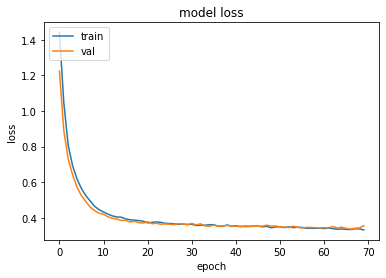

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, precision_recall_curve, roc_curve, roc_auc_score

from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.utils.all_utils import to_categorical


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train_target = to_categorical(y_train)      
y_test_target = to_categorical(y_test)

model = Sequential()
model.add(Dense(200, input_dim=4, activation='relu'))    
model.add(Dropout(0.25))                                
# model.add(Dense(190, activation='relu'))
# model.add(Dropout(0.30))
# model.add(Dense(150, activation='relu'))
# model.add(Dropout(0.30))
# model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.30))
# model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.30))
# model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy')    

history = model.fit(X_train, y_train_target, validation_split=0.1, epochs=70)

print(model.evaluate(X_test, y_test_target))    

y_pred = np.argmax(model.predict(X_test), axis=1)

############################################################################################################

print("Test acc: " + str(accuracy_score(y_test, y_pred)))

print("The Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [187]:
none = np.array([0.26,0.07,0.1,0.32]).reshape(-1,4)
pred = np.argmax(model.predict(none), axis=1)
print(pred)

index = np.array([0.9, 0.1, 0.4, 0.5]).reshape(-1,4)
pred = np.argmax(model.predict(index), axis=1)
print(pred)

middle = np.array([1.6, 0.2, 1.5, 1.6]).reshape(-1,4)
pred = np.argmax(model.predict(middle), axis=1)
print(pred)

fourth = np.array([1.9, 0.3, 0.6, 1.1]).reshape(-1,4)
pred = np.argmax(model.predict(fourth), axis=1)
print(pred)

pinky = np.array([0.6, 0.2, 0.6, 1.1]).reshape(-1,4)
pred = np.argmax(model.predict(pinky), axis=1)
print(pred)

[3]
[2]
[2]
[2]
[2]


In [188]:
# Set 1
none = np.array([0.18,0.07,0.27,0.26]).reshape(-1,4)
pred = np.argmax(model.predict(none), axis=1)
print(pred)

index = np.array([1.07, 0.08, 0.49, 0.61]).reshape(-1,4)
pred = np.argmax(model.predict(index), axis=1)
print(pred)

middle = np.array([2.02, 0.12, 0.76, 1.42]).reshape(-1,4)
pred = np.argmax(model.predict(middle), axis=1)
print(pred)

fourth = np.array([1.06, 0.16, 0.61, 1.25]).reshape(-1,4)
pred = np.argmax(model.predict(fourth), axis=1)
print(pred)

pinky = np.array([0.55, 0.1, 0.28, 0.88]).reshape(-1,4)
pred = np.argmax(model.predict(pinky), axis=1)
print(pred)

# Set 2
none = np.array([0.29,0.07,0.19,0.23]).reshape(-1,4)
pred = np.argmax(model.predict(none), axis=1)
print(pred)

index = np.array([1.68,0.11,0.85,0.79]).reshape(-1,4)
pred = np.argmax(model.predict(index), axis=1)
print(pred)

middle = np.array([1.12,0.09,0.75,1.12]).reshape(-1,4)
pred = np.argmax(model.predict(middle), axis=1)
print(pred)

fourth = np.array([0.77,0.11,0.52,1.49]).reshape(-1,4)
pred = np.argmax(model.predict(fourth), axis=1)
print(pred)

pinky = np.array([0.57,0.08,0.44,0.99]).reshape(-1,4)
pred = np.argmax(model.predict(pinky), axis=1)
print(pred)


[2]
[2]
[2]
[2]
[2]
[3]
[2]
[2]
[2]
[2]
